# SPEI - Historical data - Cork Airport

In [2]:
# set working directory to root
setwd("../../")

In [3]:
# import requirements and functions
source(
    "./jupyter-notebooks/scripts/spi-spei.R",
    echo = TRUE,
    max.deparse.length = 2000
)


> library(eurocordexr)


Loading required package: data.table

Loading required package: magrittr

Loading required package: ncdf4

Loading required package: ncdf4.helpers




> library(SPEI)


Loading required package: lmomco

Loading required package: parallel

Loading required package: ggplot2

# Package SPEI (1.7) loaded [try SPEINews()].




> library(latticeExtra)


Loading required package: lattice


Attaching package: ‘latticeExtra’


The following object is masked from ‘package:ggplot2’:

    layer





> library(lubridate)



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union





> kelvin_to_celsius <- function(kelvin) {
+     celsius <- (kelvin - 273.15)
+     return(celsius)
+ }

> kgm2s_to_mmday <- function(kgm2s) {
+     mmday <- (kgm2s * 60 * 60 * 24)
+     return(mmday)
+ }

> ec_process <- function(datapath, indexcell, var) {
+     df <- nc_grid_to_dt(filename = datapath, variable = var)
+     df <- subset(df, icell == indexcell)
+     df$date <- as.Date(df$date, format = "%Y-%m-%d")
+     df$month <- month(df$date, label = TRUE)
+     df$year <- year(df$date)
+     if (var == "pr") {
+         df$pr <- kgm2s_to_mmday(df$pr)
+     }
+     else if (var == "tasmax") {
+         df$tasmax <- kelvin_to_celsius(df$tasmax)
+     }
+     else if (var == "tasmin") {
+         df$tasmin <- kelvin_to_celsius(df$tasmin)
+     }
+     return(df)
+ }

> hist_process <- function(datadir, variable, indexcell) {
+     ncfile <- paste(datadir, variable, "_EUR-11_NCC-NorESM1-M_historical_r1i1p1_DMI-HIRHAM5_v3_mon_", 
+         sep = "")
+     d1 <- ec_process(datapath = 

In [4]:
# Cork Airport grid cell
indexcell <- 68801

# latitude
lat <- 51.84722

# directory where the historical nc files are stored
datadir <- "./data/eurocordex/DMI/historical/mon/"

In [5]:
# process precipitation data
data <- hist_process(
    datadir = datadir, variable = "pr", indexcell = indexcell
)

In [6]:
# process tasmax data
data$tasmax <- hist_process(
    datadir = datadir, variable = "tasmax", indexcell = indexcell
)$tasmax

In [7]:
# process tasmin data
data$tasmin <- hist_process(
    datadir = datadir, variable = "tasmin", indexcell = indexcell
)$tasmin

In [8]:
head(data)

pr,month,year,tasmax,tasmin
<dbl>,<ord>,<dbl>,<dbl>,<dbl>
3.902974,Jan,1976,9.011163,5.320459
6.861049,Feb,1976,7.400751,2.324884
4.887853,Mar,1976,9.951074,5.830103
3.667969,Apr,1976,9.551019,4.726617
3.170111,May,1976,13.697687,7.829370
5.109375,Jun,1976,16.348444,10.783685


In [9]:
dcast(data, year~month, value.var = c("pr"))

year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,3.902974,6.861049,4.887853,3.667969,3.1701108,5.1093749,1.8719758,4.4231350,4.0643230,3.218750,4.762240,5.481351
1977,8.893145,2.312221,4.000000,4.880729,2.4727822,1.7151041,3.3772681,1.8928931,2.1231770,3.553679,2.808333,3.469758
1978,2.589970,2.392578,4.922127,4.527344,2.5521674,2.0010417,2.8802924,2.2726815,2.3825520,2.784778,7.133333,3.614163
1979,3.309980,2.128627,3.158266,4.671875,1.2323588,3.4466146,2.1945564,1.3452621,4.4966146,2.845010,2.828646,2.947581
1980,2.175151,5.357422,3.448085,7.453646,2.9785788,1.8669270,1.7343750,2.6607863,2.5125000,3.998740,5.252604,6.820061
1981,4.717742,3.814174,6.380544,4.165885,3.5995464,1.4820312,2.1502016,3.1113912,3.0809897,3.513357,4.857031,3.559980
1982,3.882308,3.512277,3.746472,3.466927,3.6073589,1.2916667,1.3503024,1.2159778,3.3101564,3.708669,4.835677,2.573337
1983,1.799647,5.258092,5.541583,7.255729,0.5244456,1.5085937,0.9700100,2.4740424,4.0557292,3.884073,6.238021,3.534778
1984,2.918095,3.333426,3.324093,3.977344,1.6192036,2.6395832,1.9798386,3.1421371,2.4091146,4.905494,6.964323,3.477823


In [10]:
dcast(data, year~month, value.var = c("tasmax"))

year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,9.011163,7.400751,9.951074,9.551019,13.69769,16.34844,16.17764,16.11682,14.32757,13.25073,11.427881,8.470819
1977,8.944910,9.728571,9.662012,11.174554,13.58447,15.75875,17.74166,17.20126,16.28008,12.31078,9.789056,9.224390
1978,9.415338,8.480920,9.622705,11.822137,14.74053,16.45791,17.46682,18.11190,16.30850,12.58810,10.974695,10.179071
1979,8.884027,10.074854,10.764276,11.378198,15.31378,16.81320,17.27633,17.58944,17.16659,12.83346,10.649469,7.422205
1980,8.310358,9.683160,9.473932,11.423029,14.30108,16.86218,17.22241,17.28600,16.70138,11.87686,8.191034,9.359918
1981,9.667810,9.137079,10.749017,11.967157,14.16436,15.78875,17.14202,16.76943,16.21496,14.23309,11.439508,9.386804
1982,9.711786,10.332666,9.806085,11.569757,14.60943,15.68041,17.27123,18.95809,17.42150,15.33993,12.512445,9.640588
1983,12.302881,9.242181,9.510065,11.591333,15.44772,17.19180,18.96652,17.76495,16.57534,12.16012,9.208063,8.118158
1984,7.078546,9.046045,10.150446,12.256586,15.02239,16.20931,17.85534,17.80828,16.66580,12.90878,10.535822,9.390436


In [11]:
dcast(data, year~month, value.var = c("tasmin"))

year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,5.320459,2.324884,5.830103,4.726617,7.829370,10.783685,10.93850,11.08886,9.698785,8.605890,7.442926,5.208368
1977,5.456934,4.747339,4.761346,6.142206,8.289606,10.070154,11.97875,11.57095,10.440698,7.934686,6.357599,5.650201
1978,5.671808,3.657465,5.287988,7.060571,9.245844,10.810327,12.17407,12.67333,10.770105,8.276941,6.936853,6.281824
1979,4.433130,5.805963,4.873346,5.181665,9.290277,11.318719,11.46237,11.31222,12.461938,8.140344,6.417352,3.041986
1980,4.326685,5.305963,4.448022,7.243707,9.170740,10.819696,12.07800,12.17706,11.934259,7.495447,4.117914,5.468164
1981,5.536890,5.552576,6.670953,6.957422,9.039880,10.113489,11.59072,11.36962,11.341699,9.661584,7.106683,5.532037
1982,5.589441,5.637720,4.532861,6.143304,9.010797,9.032678,11.75872,13.08795,11.550073,10.573938,8.775537,5.095209
1983,8.698450,4.736719,4.957239,6.890955,8.484644,10.986353,13.15313,12.18820,11.156061,7.530634,5.104608,4.734399
1984,3.839624,4.730798,6.087488,7.781458,8.553644,10.391931,11.96130,11.94744,11.316522,8.869714,6.667352,5.544885


## SPEI-12

In [12]:
spei <- spei_calc(data = data, spei_num = 12, lat = lat)

In [13]:
# view the data
spei

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2.117307188
1977,2.257215440,2.220528803,2.22800144,2.317474049,2.21768827,2.05976464,1.877544369,1.52531988,1.135280616,1.2525571303,1.22075151,0.916194301
1978,0.505037726,0.586925345,0.77995619,0.830725450,0.50382122,0.50757335,0.787286184,0.69623529,0.806962237,0.7623061278,0.92229949,0.748313077
1979,0.717846360,0.702415474,0.21155369,-0.128085076,-0.51344578,-0.32954166,-0.580527386,-0.81364773,-0.552819562,-0.6487854927,-0.94520741,-0.932741693
1980,-1.020235696,-0.834893022,-0.55466963,0.258088042,0.86383712,0.63191559,0.943036928,1.30684088,1.297158352,1.4565185944,1.62770335,1.551186518
1981,1.599925141,1.703662148,1.96011051,1.758904767,1.65176546,1.83362521,1.786113772,1.74593391,1.874936947,1.7729395815,1.65795436,1.302526839
1982,1.240785332,1.137366698,0.90188475,0.884312333,0.56576157,0.30136091,0.305523636,-0.38133531,-0.827225272,-0.9424681957,-0.89445966,-0.995162392
1983,-1.227168523,-1.069715751,-0.81971532,-0.368292141,-1.17941520,-1.31670299,-1.944080209,-1.27198030,-1.056582438,-0.8140682032,-0.61332891,-0.436200419
1984,-0.240142458,-0.372847870,-0.49843117,-0.803967565,-0.38490630,0.16131983,0.475994785,0.37217491,0.276740056,0.4040908285,0.41960994,0.266565647


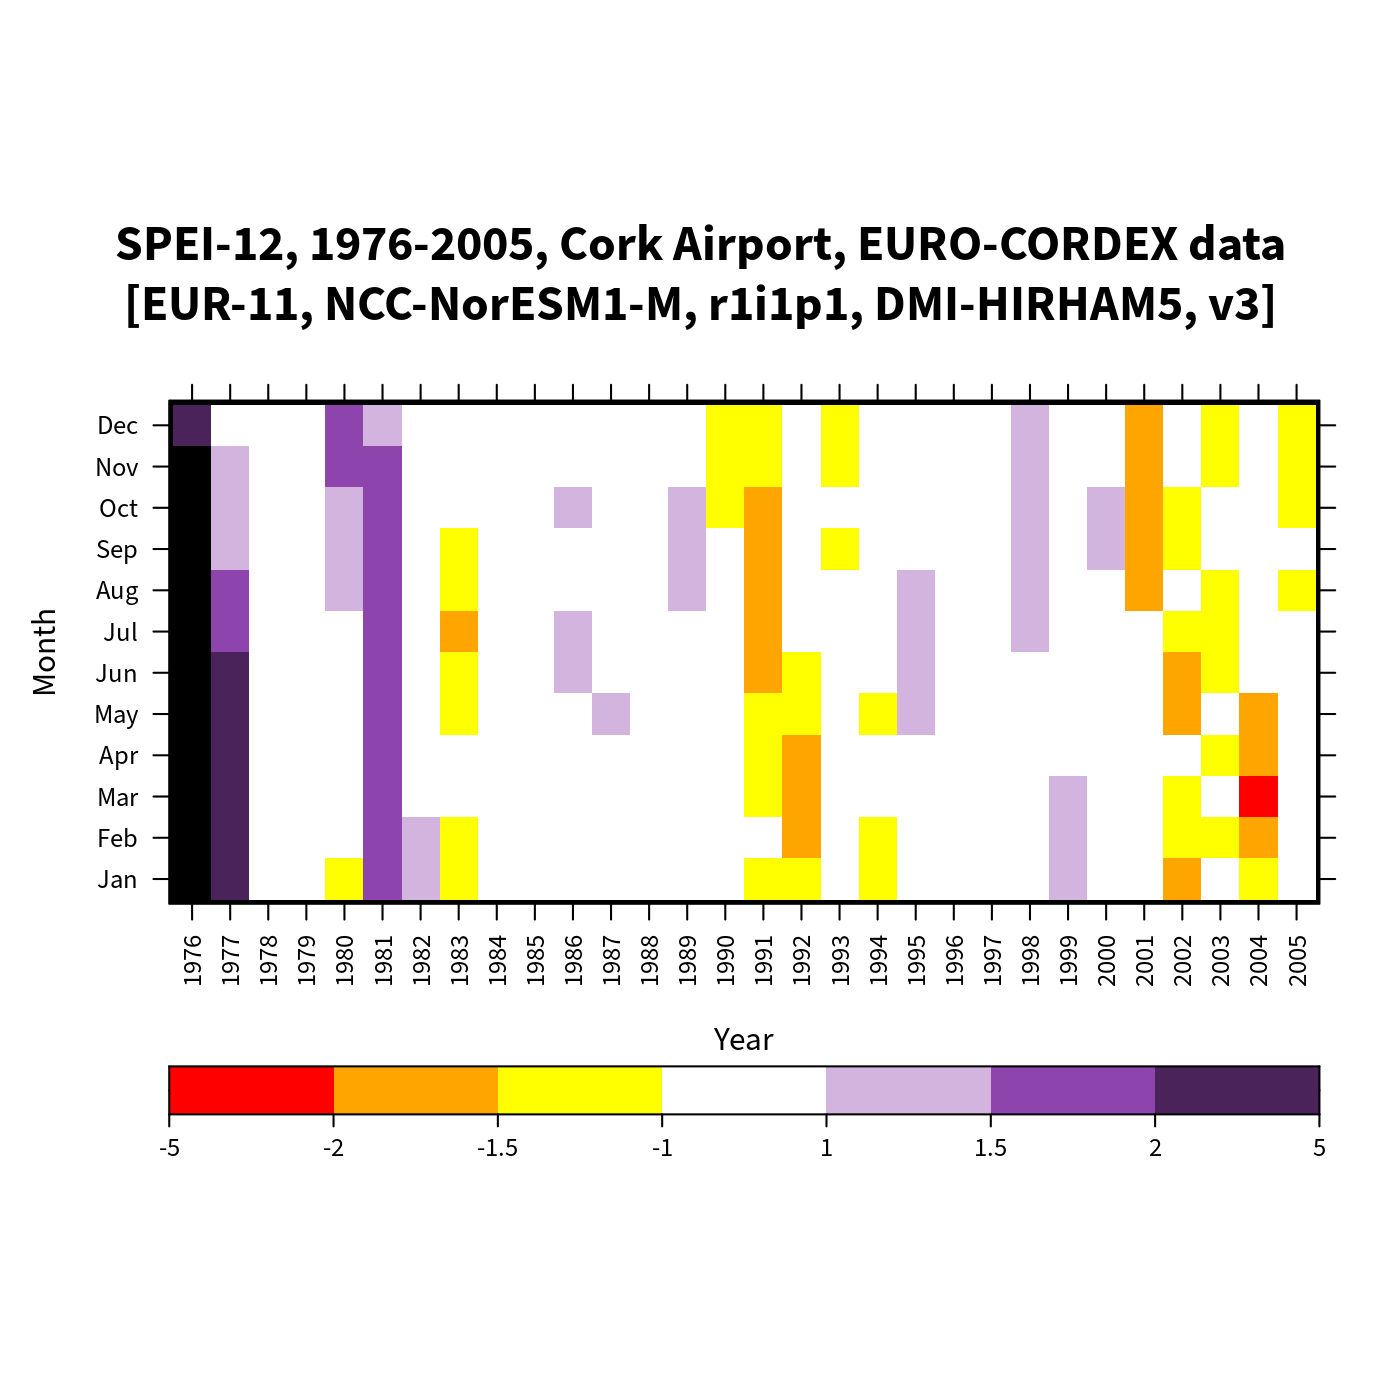

In [16]:
plot_title <- paste(
    "SPEI-12, 1976-2005, Cork Airport, EURO-CORDEX data",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spei, plot_title = plot_title)

## SPEI-6

In [17]:
spei <- spei_calc(data = data, spei_num = 6, lat = lat)

In [18]:
# view the data
spei

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,NA,NA,NA,NA,NA,1.7120966,1.82849411,1.8920795,2.0820293,2.13267071,2.1304079508,2.19758179
1977,2.44928151,1.87911117,0.91330456,1.33097031,1.620936e+00,1.2808476,0.84978205,0.9173980,0.7743752,0.71370295,0.3419738414,0.06771007
1978,-0.25933906,-0.76247307,0.27752550,0.49272533,6.029489e-01,0.5641755,0.94854370,0.8896206,0.6580075,0.53238503,0.7447772994,0.65639408
1979,0.07050666,-0.20473797,-1.07910162,-1.18895876,-2.121214e+00,-1.1538193,-0.81787621,-0.8393531,-0.2264521,-0.23635812,0.0689132637,-0.34168241
1980,-0.78765423,0.13576353,-0.68888838,0.99262348,1.522312e+00,1.0460895,1.33680053,1.3185720,1.4387652,1.21287022,1.1224065286,1.69532780
1981,1.61197123,1.74127227,1.81500311,1.64923303,1.739623e+00,1.3447368,1.34422930,1.3053418,1.2538789,1.31046873,0.9677147855,0.83948020
1982,0.61909719,-0.12832370,-0.97223038,-0.68130708,-2.912290e-01,-0.4723490,-0.13124450,-0.4194493,-0.5355582,-0.83495470,-0.9998659964,-1.16757902
1983,-2.09829788,-2.05974473,-0.59462102,0.88643863,-7.152447e-01,-0.7625385,-0.81344690,-0.7565453,-0.8926639,-1.44203652,-0.4150213167,0.03756909
1984,0.81606376,1.12672569,1.09525834,1.22197227,7.972626e-05,0.1006378,-0.04842597,-0.1131070,-0.2683177,-0.36938306,0.4511078200,0.29001225


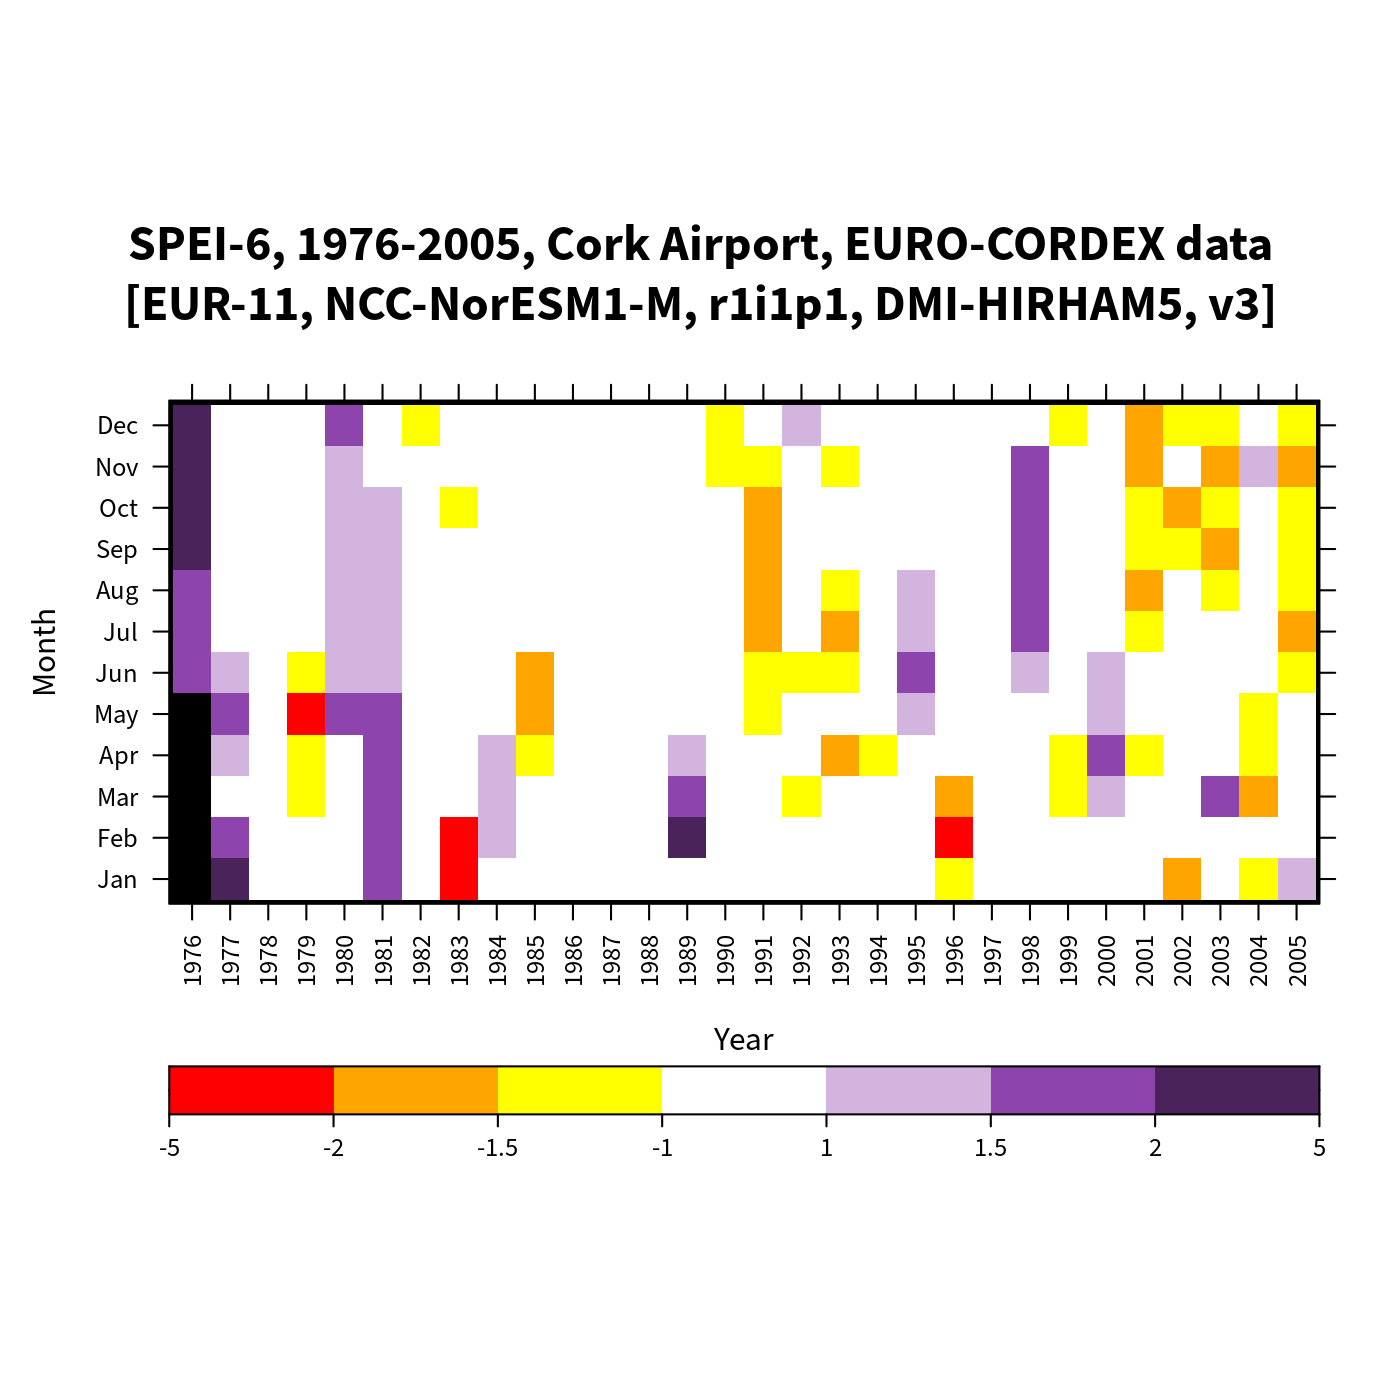

In [19]:
plot_title <- paste(
    "SPEI-6, 1976-2005, Cork Airport, EURO-CORDEX data",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spei, plot_title = plot_title)

## SPEI-3

In [20]:
spei <- spei_calc(data = data, spei_num = 3, lat = lat)

In [21]:
# view the data
spei

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,NA,NA,1.46661451,1.84023112,1.53452610,1.3716118,1.55958830,1.94467929,2.25400171,2.49048816,1.78949289,0.52832676
1977,1.905137819,1.45275921,0.71851220,0.09749495,1.22026256,1.1436558,0.95314851,0.42447473,0.02627081,-0.08768203,-0.29298556,0.18746925
1978,-0.453176655,-0.93095007,0.09334772,0.68151936,1.00681037,0.5637959,0.72308819,0.55906957,0.51341454,-0.11850355,0.65189724,0.65367734
1979,0.336308833,-1.27982629,-1.61949428,-1.38011986,-1.87170096,-0.4449292,-0.18138220,-0.07633868,0.08174165,-0.33555795,0.27592789,-1.21051625
1980,-1.260184668,-0.21141121,-0.07923290,1.52679291,1.71698942,1.1876034,0.77889692,0.65099388,1.27518203,1.41815696,1.59086260,1.82608363
1981,1.409961751,1.35425794,1.24727679,1.02074158,1.43333065,0.9787224,1.18624908,0.91611057,1.14952764,1.01909400,0.39246019,-0.72999371
1982,-0.332102787,-0.80553612,-0.71409875,-0.58734417,0.03228202,-0.1966468,0.04691524,-0.63415250,-0.70837447,-1.78807412,-1.40736817,-1.61526321
1983,-1.665925103,-1.32739831,0.32590780,1.58328611,-0.20647303,-1.0189383,-1.89758304,-0.90887545,-0.40956329,0.38290729,1.25153997,1.16938698
1984,1.100713215,0.44181926,0.52035920,0.67100827,-0.23347888,-0.1814274,-0.68110712,-0.08493363,-0.27618750,0.25414897,1.41457461,1.47113985


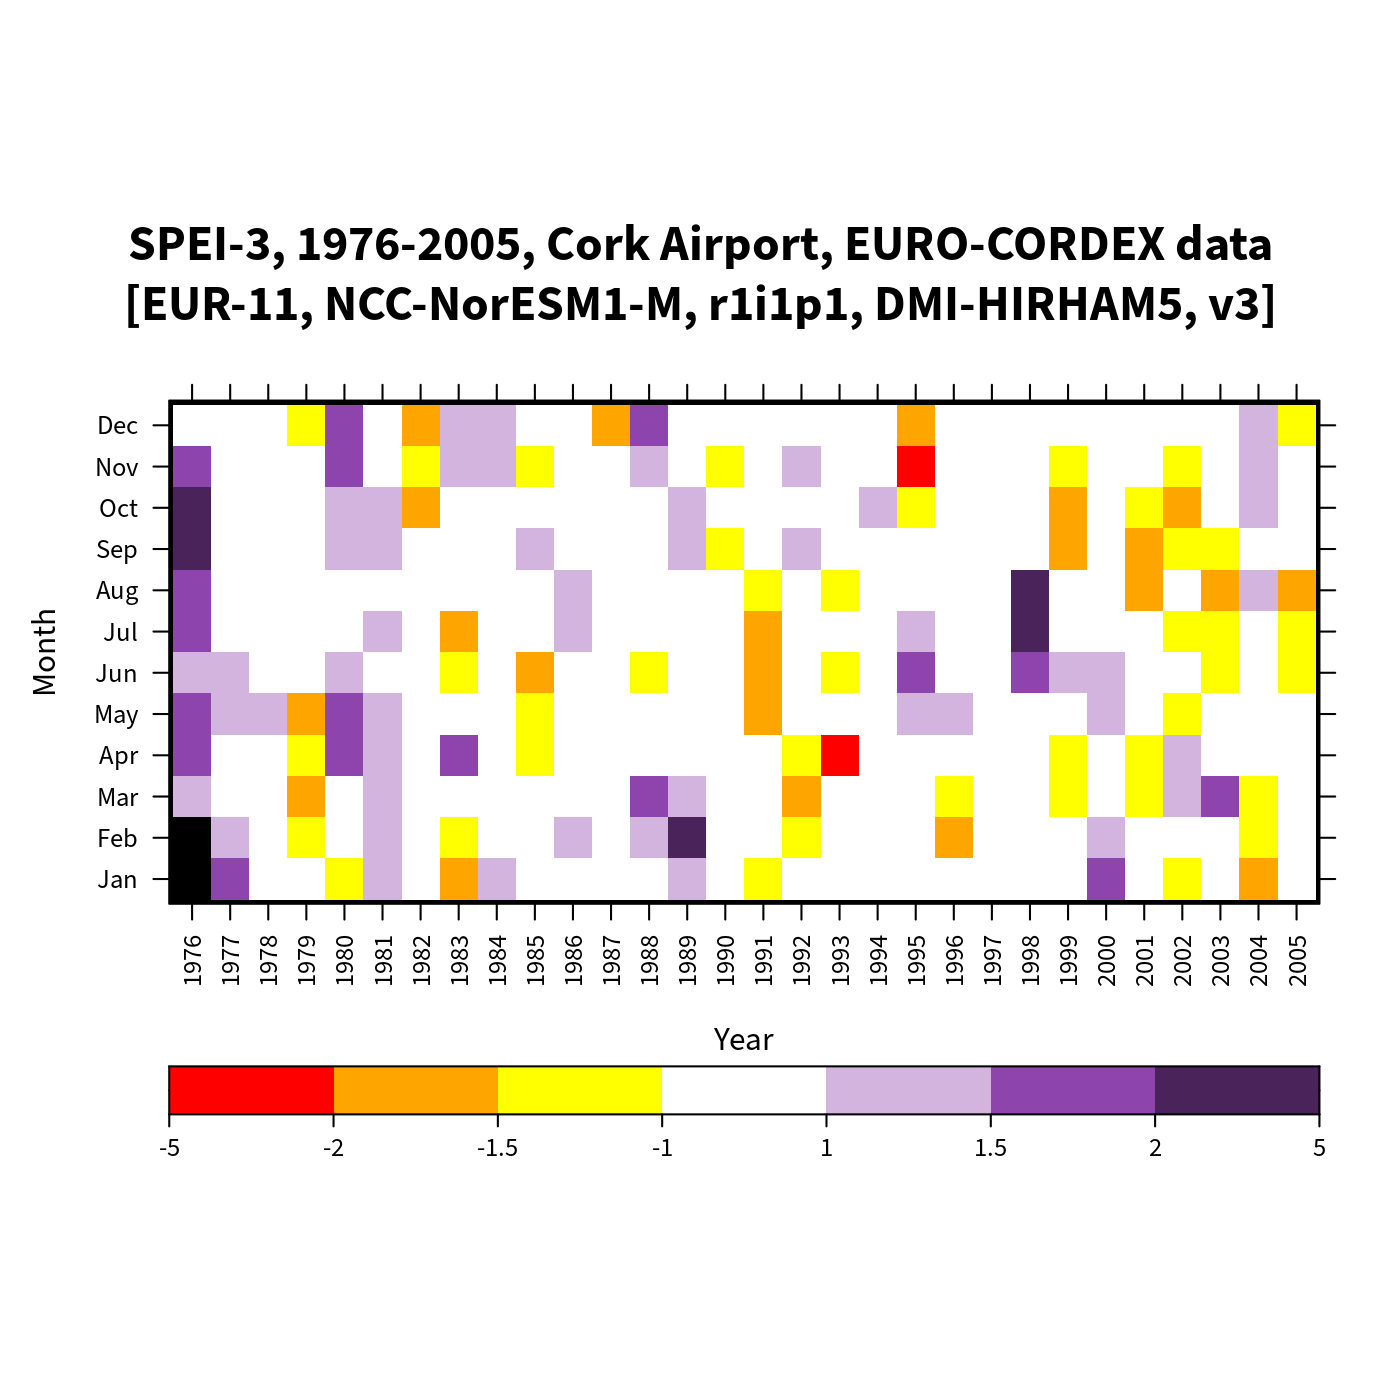

In [23]:
plot_title <- paste(
    "SPEI-3, 1976-2005, Cork Airport, EURO-CORDEX data",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spei, plot_title = plot_title)

## SPEI-1

In [24]:
spei <- spei_calc(data = data, spei_num = 1, lat = lat)

In [25]:
# view the data
spei

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,0.529131457,1.38736153,1.216357396,1.340736217,0.28434791,0.90858106,1.54787753,2.08599760,2.40729643,-0.73584780,0.135316293,1.679150277
1977,2.119423644,-1.92788842,0.198769468,0.690240617,1.00370558,0.51510891,0.27433826,0.09760674,-0.58685417,0.58963630,-0.065861038,-0.079452748
1978,-0.605265503,-0.80326838,1.140640666,0.586441630,-0.04157521,0.28536883,1.01991897,-0.07829689,-0.13526521,-0.04165869,1.363571789,-0.569499771
1979,-0.482543744,-1.22457074,-1.537191888,-0.526029326,-1.15569816,0.52207903,0.22468696,-1.17881332,1.29590595,-0.79198066,-1.062543002,-0.636910035
1980,-0.800760160,0.73823262,-0.039172293,1.991866066,0.90634188,-0.33554523,1.12628583,1.04772908,0.78923993,1.18940236,1.157803780,1.843086189
1981,0.519874261,0.86064561,1.404612791,0.161065112,1.17687321,0.47729575,0.68266528,1.03282012,1.07274368,-1.00605107,-0.112367389,-0.313172212
1982,-0.033957859,-0.87744533,-0.356774746,-0.232365693,0.15127735,-0.42478525,0.48224048,-1.45479088,-0.85296160,-1.68558924,0.086086307,-1.872933021
1983,-2.785376406,0.74107769,1.169232303,1.380769691,-1.86547578,-0.70567795,-1.11041012,-0.02024801,0.46657063,0.48255610,1.330511545,0.468775707
1984,0.741477935,0.06913608,0.674305326,0.580405686,-1.31971498,0.33047122,-0.32406853,-0.29675984,-0.07134730,1.75560505,1.472223479,-0.380653492


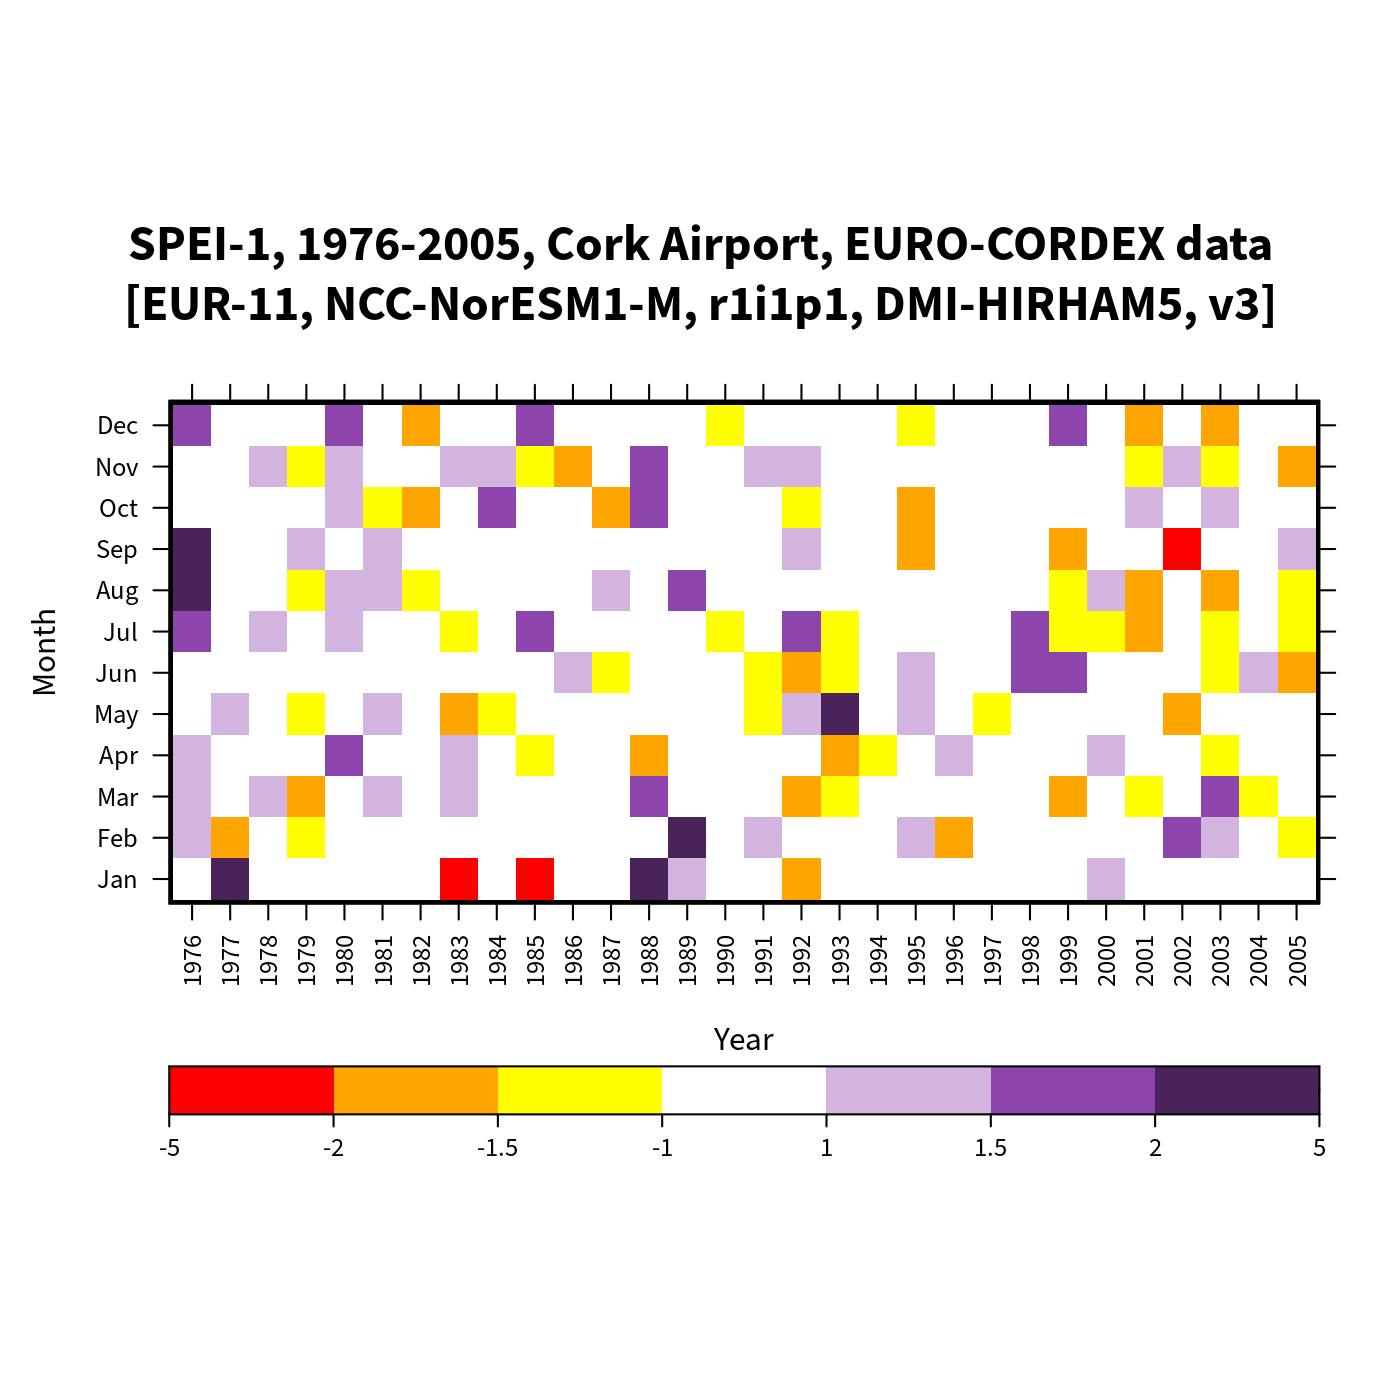

In [26]:
plot_title <- paste(
    "SPEI-1, 1976-2005, Cork Airport, EURO-CORDEX data",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spei, plot_title = plot_title)

## Validation

Monthly historical Cork Airport data from Met Éireann: <https://www.met.ie/climate/available-data/historical-data>

Direct download link:

- Data from 1961 to present: <https://cli.fusio.net/cli/climate_data/webdata/mly3904.zip>

In [27]:
# read data
data <- readLines("./data/met/raw/meteireann/corkairport/mly3904/mly3904.csv")
# https://stackoverflow.com/a/15860268
data <- data[-1:-19]
data <- read.csv(
    textConnection(data), header = TRUE, stringsAsFactors = FALSE
)

In [28]:
head(data)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1962,1,5.5,11.6,-3.8,8.2,2.7,NA,-6.3,12.8,70,NA
2,1962,2,5.3,12.3,-2.7,7.9,2.7,NA,-4.4,13.6,57,NA
3,1962,3,4.2,12.2,-5.4,7.5,0.9,NA,-7.2,10.3,63,NA
4,1962,4,7.7,18.8,0.6,11.2,4.1,68.6,-1.3,11.7,62,201.1
5,1962,5,9.7,16.1,2.3,13.3,6.2,80.7,-0.7,12.0,45,216.5
6,1962,6,12.0,21.1,2.4,16.1,7.9,50.2,0.9,11.2,51,236.7


In [29]:
# filter for the past data range
data <- subset(data, year < 2006 & year > 1975)

In [30]:
# keep only required data
data <- subset(data, select = c(year, month, rain, maxtp, mintp))

In [31]:
head(data)

,year,month,rain,maxtp,mintp
,<int>,<int>,<dbl>,<dbl>,<dbl>
169,1976,1,90.3,12.3,-2.6
170,1976,2,67.0,12.3,-1.6
171,1976,3,111.0,14.2,0.0
172,1976,4,20.7,15.6,-1.0
173,1976,5,113.1,16.5,3.1
174,1976,6,51.6,25.7,6.5


In [32]:
# rename columns
colnames(data)[3] <- "pr"
colnames(data)[4] <- "tasmax"
colnames(data)[5] <- "tasmin"

In [33]:
head(data)

,year,month,pr,tasmax,tasmin
,<int>,<int>,<dbl>,<dbl>,<dbl>
169,1976,1,90.3,12.3,-2.6
170,1976,2,67.0,12.3,-1.6
171,1976,3,111.0,14.2,0.0
172,1976,4,20.7,15.6,-1.0
173,1976,5,113.1,16.5,3.1
174,1976,6,51.6,25.7,6.5


In [34]:
# convert precipitation to mm/day
# https://stackoverflow.com/a/42045514
data$pr <- data$pr/days_in_month(
    paste(data$year, "-", data$month, "-15", sep = "")
)

In [35]:
# convert month format
data$month <- month(data$month, label = TRUE)

In [36]:
# sort data
data <- data[order(data$year, data$month),]

In [37]:
# reset row names
rownames(data) <- NULL

In [38]:
# convert to data table
data <- as.data.table(data)

In [39]:
dcast(data, year~month, value.var = c("pr"))

year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,2.912903,2.3103448,3.5806452,0.690000,3.6483871,1.720000,2.9935484,0.4516129,3.5633333,6.7677419,3.473333,4.7580645
1977,5.229032,8.4678571,4.8354839,1.330000,1.3193548,1.213333,0.9709677,4.0322581,2.3233333,7.1709677,3.076667,6.5806452
1978,3.432258,5.9321429,3.2451613,3.300000,0.8322581,1.996667,2.6741935,3.6806452,1.4900000,1.5838710,3.206667,8.5483871
1979,3.619355,6.8500000,3.3064516,1.320000,3.3419355,2.243333,0.5225806,2.8645161,1.6900000,4.9580645,3.290000,6.9806452
1980,4.329032,5.1758621,3.5258065,1.263333,1.1903226,1.553333,3.8129032,3.9677419,5.0233333,5.0806452,3.596667,4.2419355
1981,1.348387,3.4642857,6.8870968,1.010000,6.9806452,2.470000,1.1677419,0.6032258,5.6366667,2.5645161,3.556667,5.4354839
1982,4.387097,6.0000000,3.4032258,1.546667,2.9903226,5.513333,0.9354839,3.3838710,4.0200000,6.7580645,6.343333,4.6258065
1983,4.674194,3.5678571,3.3419355,2.853333,3.2225806,1.880000,1.2645161,2.3032258,6.4800000,3.6419355,2.580000,4.8548387
1984,6.258065,2.9586207,1.9580645,1.770000,1.4000000,1.576667,1.4935484,1.9032258,2.9533333,3.9838710,6.236667,3.2096774


In [40]:
dcast(data, year~month, value.var = c("tasmax"))

year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,12.3,12.3,14.2,15.6,16.5,25.7,24.2,27.5,19.9,15.8,11.5,8.7
1977,10.4,10.0,13.2,15.1,19.9,21.7,25.0,22.4,20.1,15.9,13.8,12.3
1978,11.4,11.3,12.1,14.0,19.8,23.1,22.1,22.4,20.1,18.1,15.0,12.6
1979,10.5,11.9,13.0,14.4,17.6,19.9,22.2,22.8,19.3,16.1,14.4,12.4
1980,10.9,11.4,11.9,15.2,18.6,18.8,19.1,24.8,18.8,14.9,14.3,12.0
1981,12.5,13.1,14.3,15.9,18.4,22.9,23.1,24.3,21.4,15.1,13.2,11.3
1982,12.2,13.4,12.9,18.5,20.1,18.5,23.4,24.2,21.7,15.7,13.8,12.7
1983,12.0,10.5,13.4,12.7,15.6,23.1,28.7,26.0,20.0,17.1,14.6,12.8
1984,12.6,11.3,12.2,17.2,17.4,23.5,25.5,22.3,20.1,16.7,12.6,12.0


In [41]:
dcast(data, year~month, value.var = c("tasmin"))

year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,-2.6,-1.6,0.0,-1.0,3.1,6.5,7.8,8.9,5.4,2.2,0.1,-3.7
1977,-4.9,-1.1,-2.2,-2.4,1.3,4.0,8.0,6.2,6.0,3.3,-2.6,0.6
1978,-2.2,-6.1,-3.7,-1.4,2.2,4.9,8.0,7.8,5.6,4.2,0.1,-5.9
1979,-8.5,-6.1,-1.4,-1.0,-0.8,6.6,6.7,7.1,3.7,1.8,-0.3,-0.6
1980,-2.2,-1.7,-2.9,1.6,3.6,6.4,7.2,7.4,6.5,1.2,-1.7,-2.4
1981,-1.1,-2.5,0.9,-0.9,1.9,6.0,8.6,7.7,6.9,-0.4,1.6,-4.8
1982,-3.9,-1.6,0.1,0.5,-0.9,8.2,7.8,6.8,5.4,2.1,-1.6,-0.8
1983,-1.0,-3.4,0.1,-1.3,3.2,5.4,8.9,7.9,5.0,0.0,-0.9,0.3
1984,-2.5,-2.0,-1.4,0.2,1.8,4.6,7.7,8.4,4.9,3.5,-0.2,-1.5


### SPEI-12

In [42]:
spei <- spei_calc(data = data, spei_num = 12, lat = lat)

In [43]:
spei

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,-1.01536140
1977,-0.929413497,-0.67320694,-0.6037002,-0.59148520,-1.23553292,-0.72962383,-0.914206172,-0.09809479,-0.131992210,-0.081312953,-0.19416823,-0.14392814
1978,-0.228938537,-0.41684798,-0.3830167,-0.14409267,-0.02598314,-0.31529737,0.474757177,0.42789111,0.346730788,0.027019611,0.02540487,0.10095287
1979,0.097966573,0.11563846,0.1058863,-0.01264333,0.42443849,1.34808202,1.102545229,0.83354688,0.801516230,0.992399820,1.05370871,1.07283196
1980,1.119868579,1.17512171,1.3170521,1.38074999,1.15498218,1.48758570,2.147678400,2.02372693,2.194675430,2.157347247,2.19006493,2.07771816
1981,2.011938789,1.90816994,1.9159681,1.82096530,1.64069909,0.99674940,-0.001727137,-0.13571876,-0.413842940,-0.501508489,-0.42626467,-0.32795551
1982,-0.262931136,-0.18363244,-0.1535245,-0.51920698,-0.93260337,0.38689747,0.177182395,0.08032824,-0.085900250,0.066050649,0.11077415,0.12911836
1983,0.154366361,0.23749338,0.2179433,1.17666190,1.87215303,0.82042726,-0.465105412,-0.81742230,-0.550779173,-0.728806205,-0.85170019,-0.79592420
1984,-0.794059256,-0.84536390,-0.8391942,-1.43612189,-1.70332139,-2.14963348,-1.425443204,-0.79875130,-0.857697836,-0.745007480,-0.58152426,-0.56718281


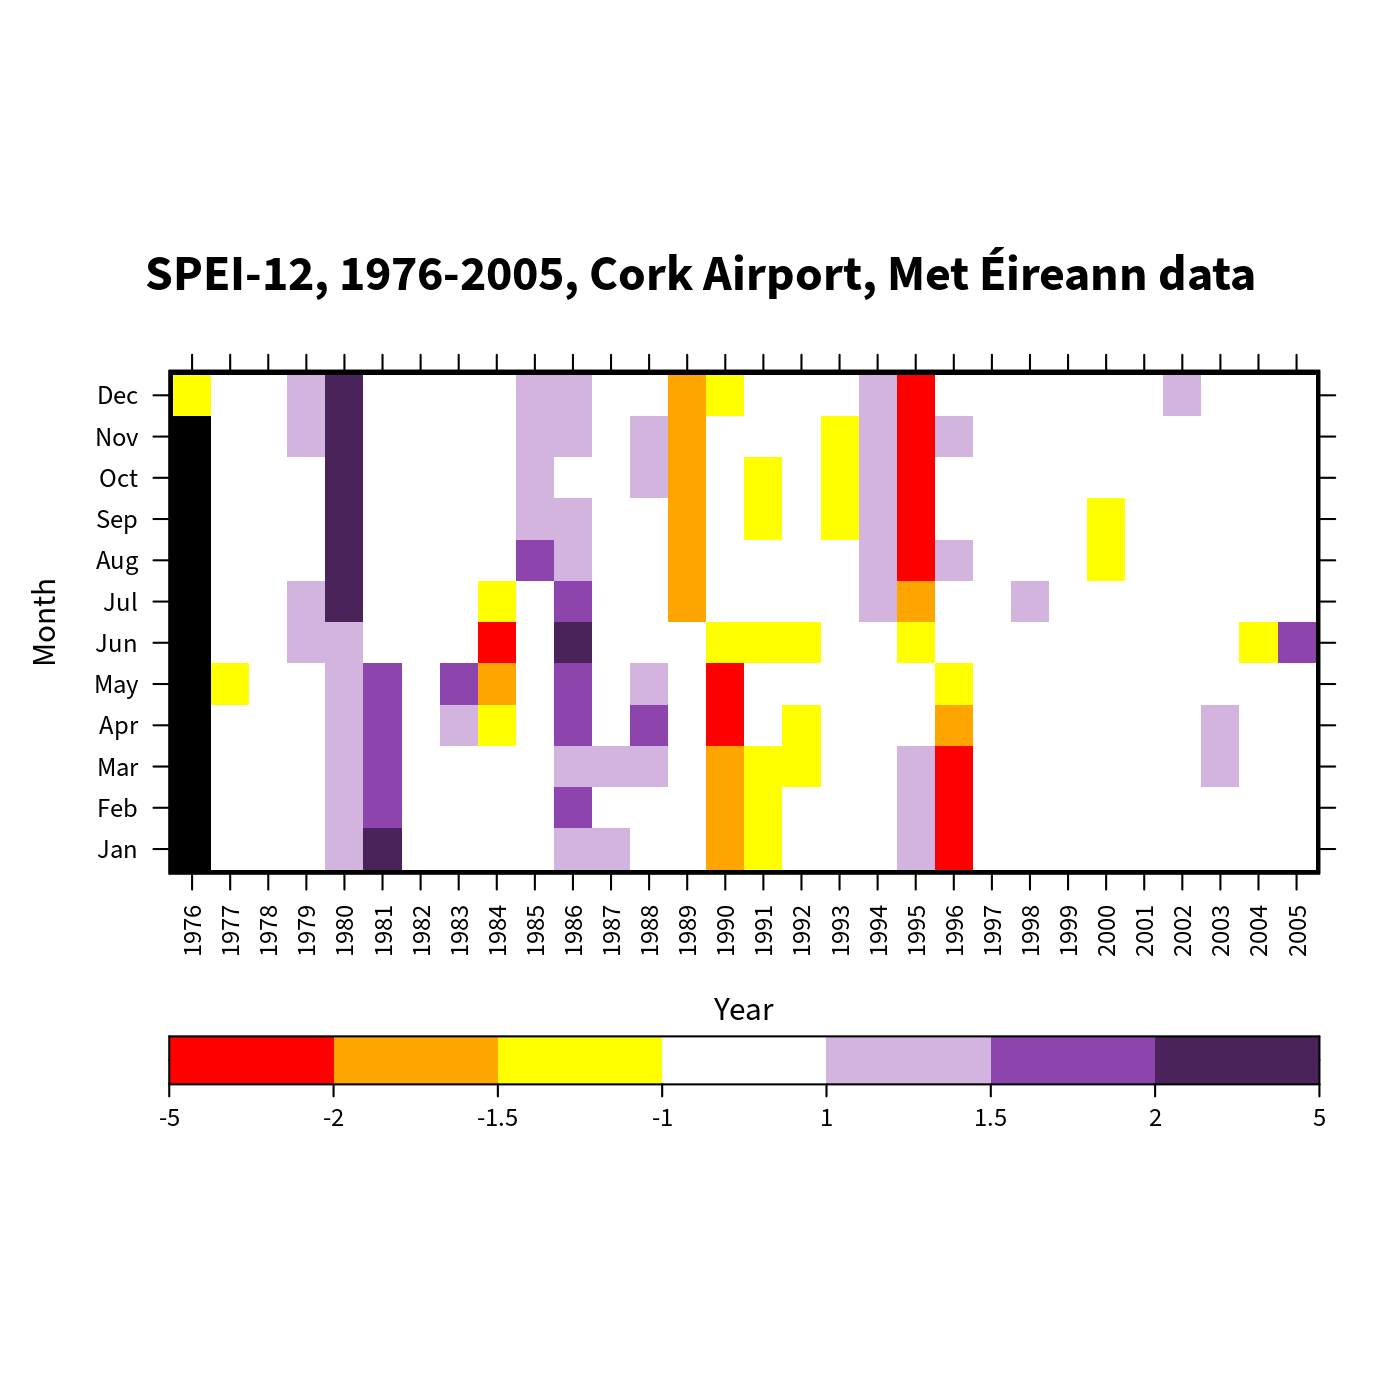

In [44]:
plot_title <- "SPEI-12, 1976-2005, Cork Airport, Met Éireann data"

spi_plot(data = spei, plot_title = plot_title)

### SPEI-6

In [45]:
spei <- spei_calc(data = data, spei_num = 6, lat = lat)

In [46]:
spei

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,NA,NA,NA,NA,NA,-0.510255720,-0.669839307,-1.234162604,-1.165916056,-1.147577238,-1.55842217,-1.0299450521
1977,-1.05547905,2.49702535,1.91845951,1.3163069,0.63399596,0.144403511,-0.544203683,-0.727283536,-0.723078423,-0.665246362,-0.62563426,-0.2766371089
1978,0.49213735,0.99495820,1.10141509,1.0088158,0.67667213,-0.114411240,0.163330889,0.144569172,0.069847511,-0.407540734,-0.43376751,0.3652354520
1979,-0.18702045,-0.43031186,-0.06157431,0.6893369,1.01556425,1.350650957,1.280923930,0.991525643,0.945504790,0.868445251,0.42829028,0.1965370783
1980,0.10711109,0.65995863,1.03143113,0.9604504,1.07338154,1.669454850,2.592322015,1.919203092,2.014198421,2.118987670,1.92721660,1.3042079138
1981,-0.30110010,0.64002611,-0.08004645,-0.4834431,0.38811264,-0.090282489,0.026012651,-0.302270157,-0.345772400,-0.330184769,-0.69841332,-0.3179778261
1982,-0.74886473,0.07528598,0.51485715,-0.5323907,-0.60475450,0.754267300,0.495227363,0.055816868,-0.169632001,0.402998707,0.69331820,-0.5067955206
1983,-0.63937742,0.31970268,1.02047916,1.3714674,1.85701245,1.421314322,-0.296003344,-0.875787161,-0.789447568,-1.307202307,-1.84551035,-2.2789631959
1984,-1.33164267,-0.17216849,-0.18785233,-0.3266298,0.56047157,-0.290540473,-0.945034022,-0.757613669,-0.801508702,-0.699801265,-0.95434076,-0.4941350677


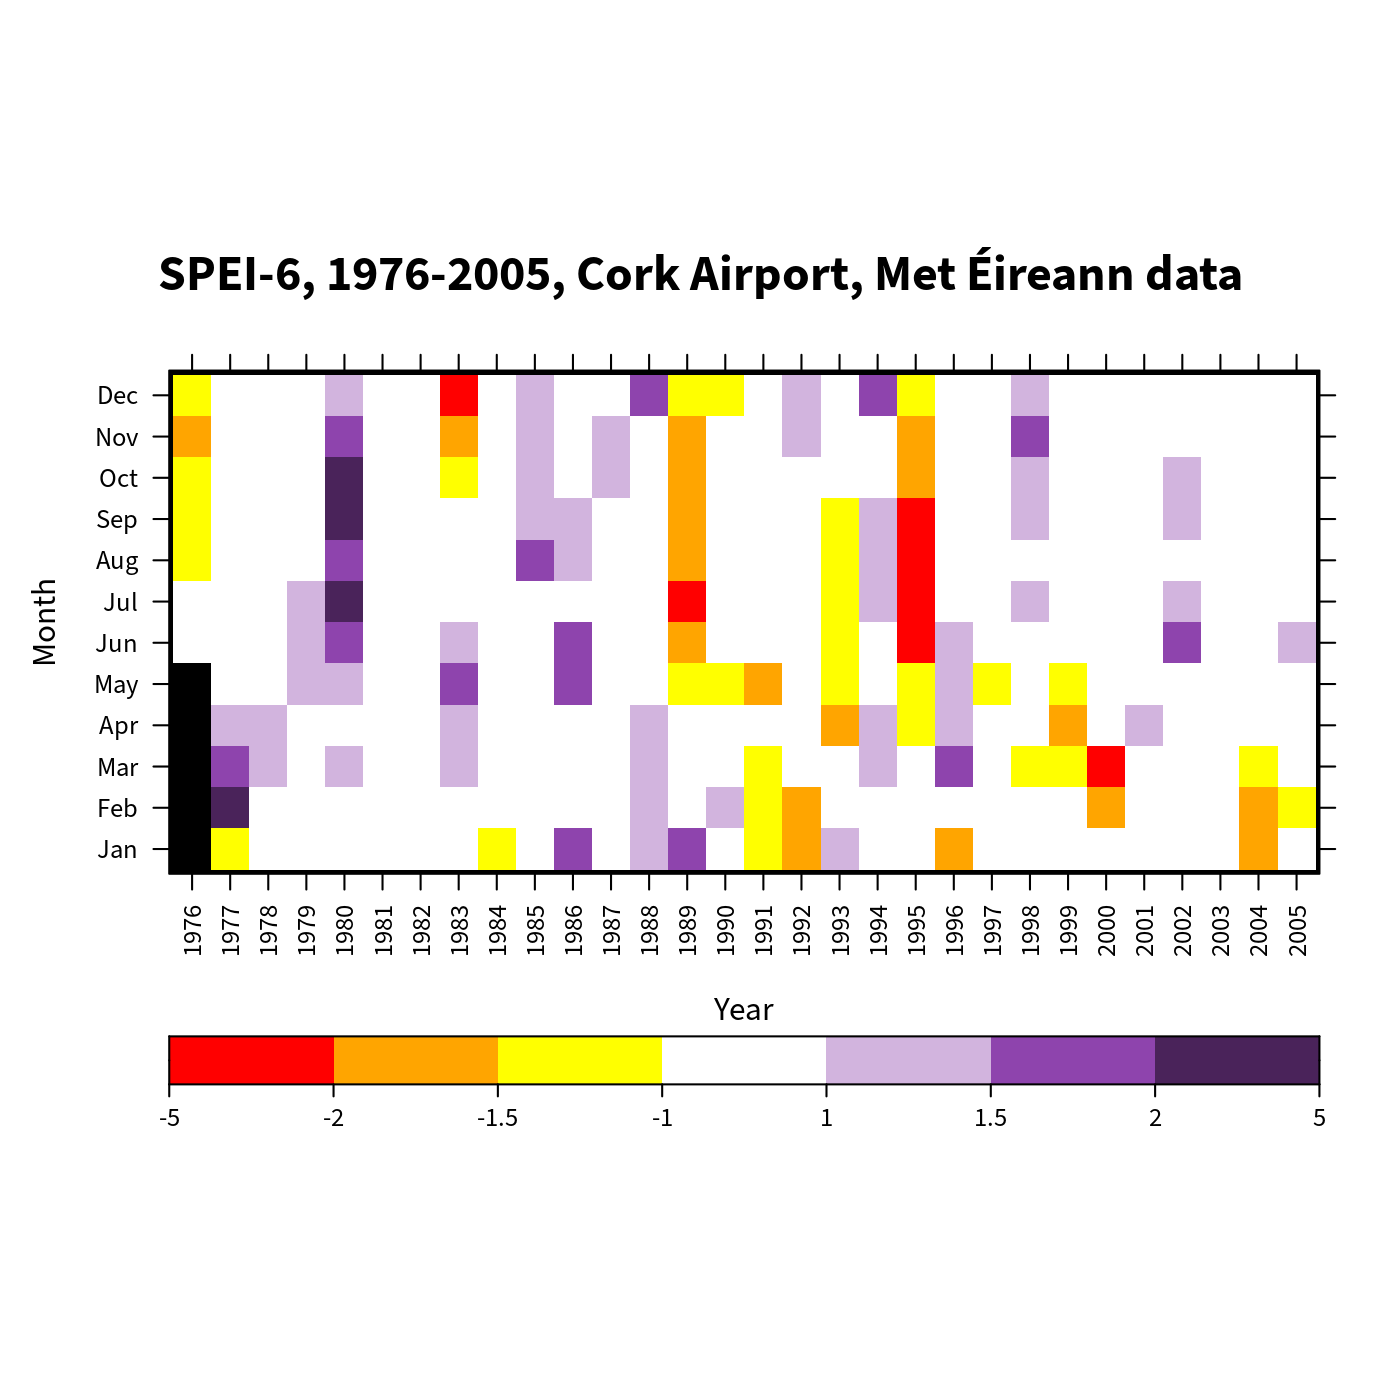

In [47]:
plot_title <- "SPEI-6, 1976-2005, Cork Airport, Met Éireann data"

spi_plot(data = spei, plot_title = plot_title)

### SPEI-3

In [48]:
spei <- spei_calc(data = data, spei_num = 3, lat = lat)

In [49]:
spei

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,NA,NA,-0.73750461,-0.40296172,1.036592928,-0.33134212,-0.58389466,-1.66416454,-1.3686811,-1.495095467,1.51269858,1.82355243
1977,1.7554809,1.927763521,1.63724012,0.90324305,-0.045100599,-0.43273598,-0.99880418,-0.84085889,-0.5313338,0.493896667,0.73386756,1.19647218
1978,0.1779969,0.791504672,0.78009710,1.10848253,0.462102475,-0.34125307,-0.35182521,-0.27949622,0.5594416,-0.188731881,-1.19125561,-0.92468129
1979,0.2199519,0.915415293,0.64402398,0.67347206,0.822379575,1.32918479,1.05763850,0.34490343,0.1036621,0.005569493,-0.05670349,0.38837920
1980,0.5560695,1.062790415,1.16792482,0.90740417,0.846108997,1.51729362,2.27721535,1.56954558,1.1989222,0.150769844,2.11402943,0.34233042
1981,-1.2220005,-1.364778171,-0.40720766,-0.22047843,0.665394875,0.04801989,0.13915088,-0.81787919,-0.3886903,-0.838847824,0.12660920,0.35537164
1982,0.4422945,0.042197657,0.48280203,-0.77495327,-0.693128399,0.71521826,0.98875064,0.58872131,-0.7408157,-0.767538421,0.16506781,1.15821539
1983,0.6092286,0.389179390,0.68053475,1.45727987,1.974521036,1.39702374,-0.96110528,-1.74980322,-2.0695453,-1.310400722,-0.42618698,-1.19269290
1984,-0.3302666,0.299757308,0.71244889,-0.34534629,0.467034269,-0.50537525,-0.94637211,-1.10483244,-0.5935562,0.285664020,0.63129924,0.52038856


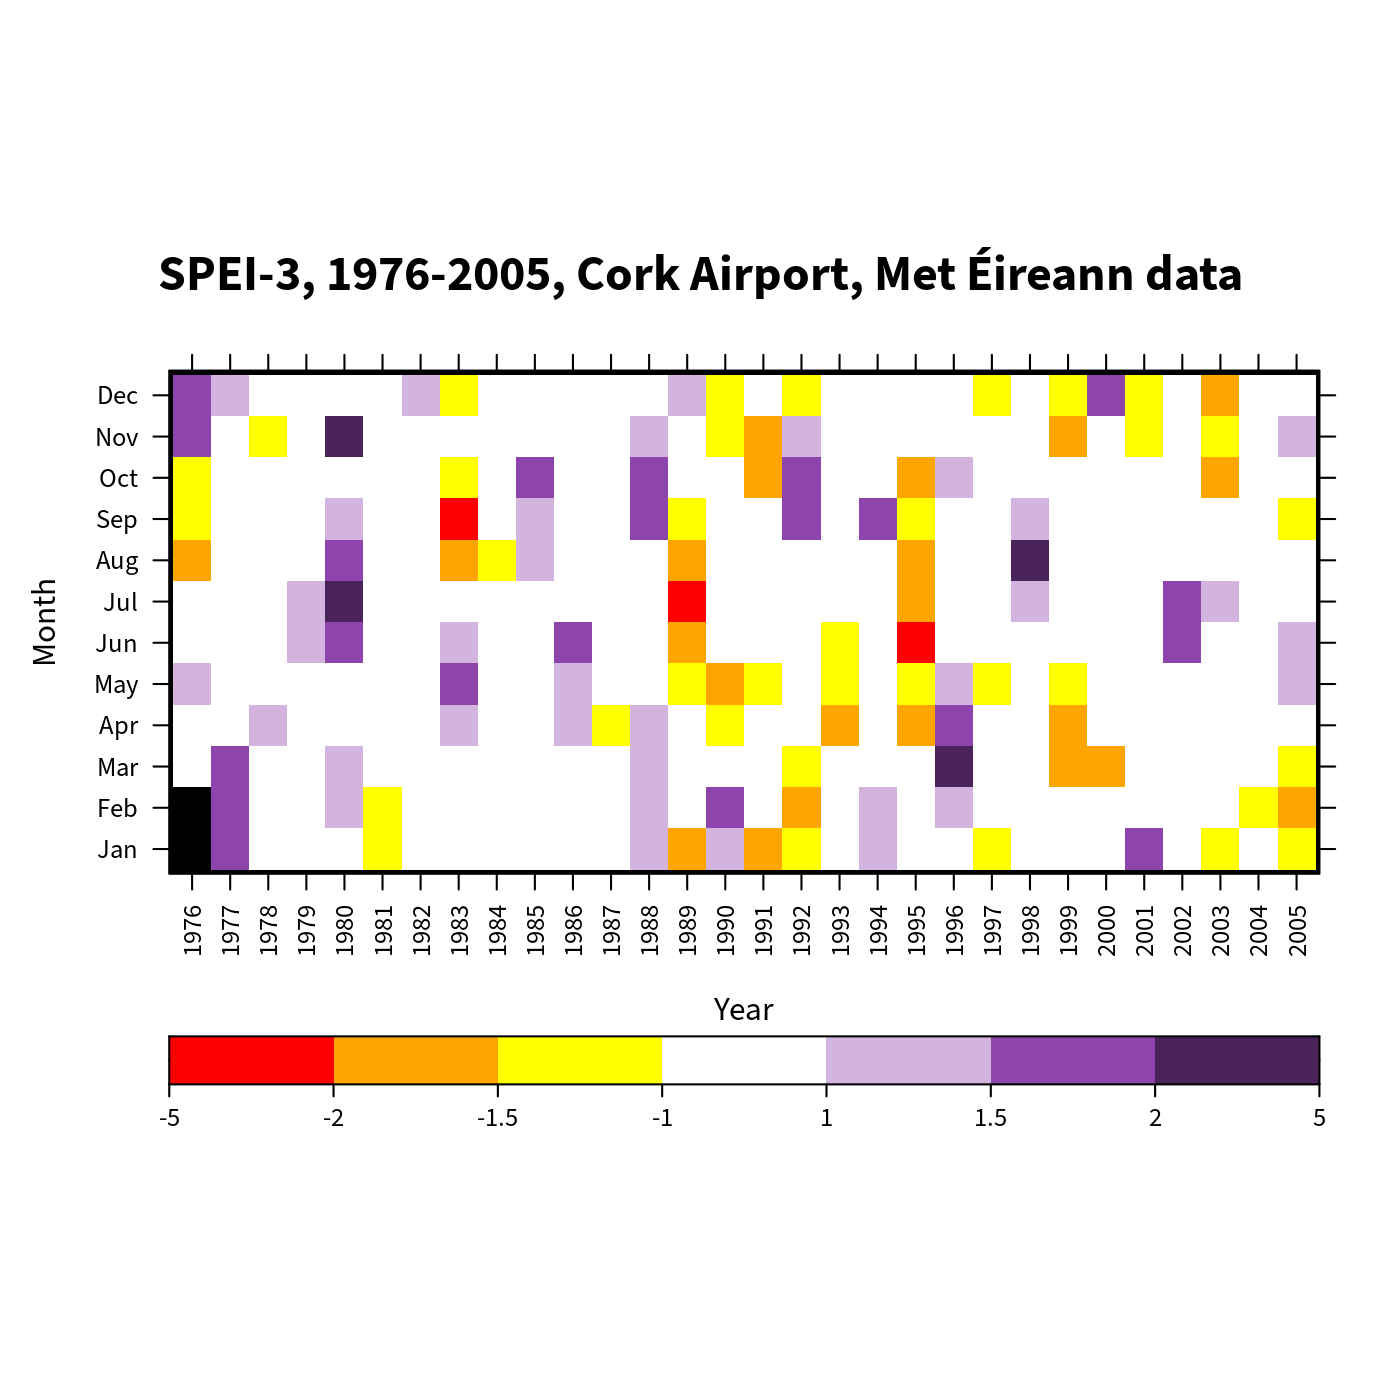

In [50]:
plot_title <- "SPEI-3, 1976-2005, Cork Airport, Met Éireann data"

spi_plot(data = spei, plot_title = plot_title)

### SPEI-1

In [51]:
spei <- spei_calc(data = data, spei_num = 1, lat = lat)

In [52]:
spei

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,-0.84575864,-0.8917841399,-0.23399932,-0.24236049,1.4941720,-1.51408222,-0.480290874,-1.90744126,0.465937313,0.87605124,1.1018980,1.37770001
1977,1.10100270,2.0667004864,0.46177808,-0.03726745,-0.3014209,-0.38527330,-0.925034941,0.03204682,0.205832545,1.14332557,-0.6210494,1.22987203
1978,-0.06044790,0.5871960271,0.70343919,1.05097979,-0.1995294,-0.78364193,0.564476589,0.27412680,-0.108575914,-1.15240004,-0.9113819,1.45134505
1979,0.11353489,0.5726650817,0.37625667,0.53996146,0.6750729,0.80259739,0.125794680,-0.10484856,0.083309456,0.17826904,-0.5831549,1.19794857
1980,0.68552535,0.6955147124,1.03998562,0.47144566,0.5599676,1.18524193,1.833876404,-0.87873538,2.069263520,0.80608868,-0.5725505,-0.24922618
1981,-1.41900002,-1.1133798330,0.73554963,-0.34762157,0.8358089,-0.55821529,0.076972563,-0.86296714,0.051383393,-0.16330113,0.5690416,0.50758776
1982,-0.20573073,-0.2218717400,0.82598079,-1.21732321,-0.4325330,1.83378709,-0.237789343,-0.74611569,-0.947304748,0.91374250,0.8643849,-0.19558976
1983,0.41785850,0.4487021110,0.38922798,1.97210925,1.7860051,-0.73781676,-2.063782197,-1.39999698,0.898106357,-0.86705416,-1.0971705,0.03875215
1984,0.67294006,-0.0499750723,0.68172952,-0.75586457,0.8610772,-0.97658148,-1.135018143,0.29623608,-0.003302124,-0.07620376,1.4718306,-0.66220762


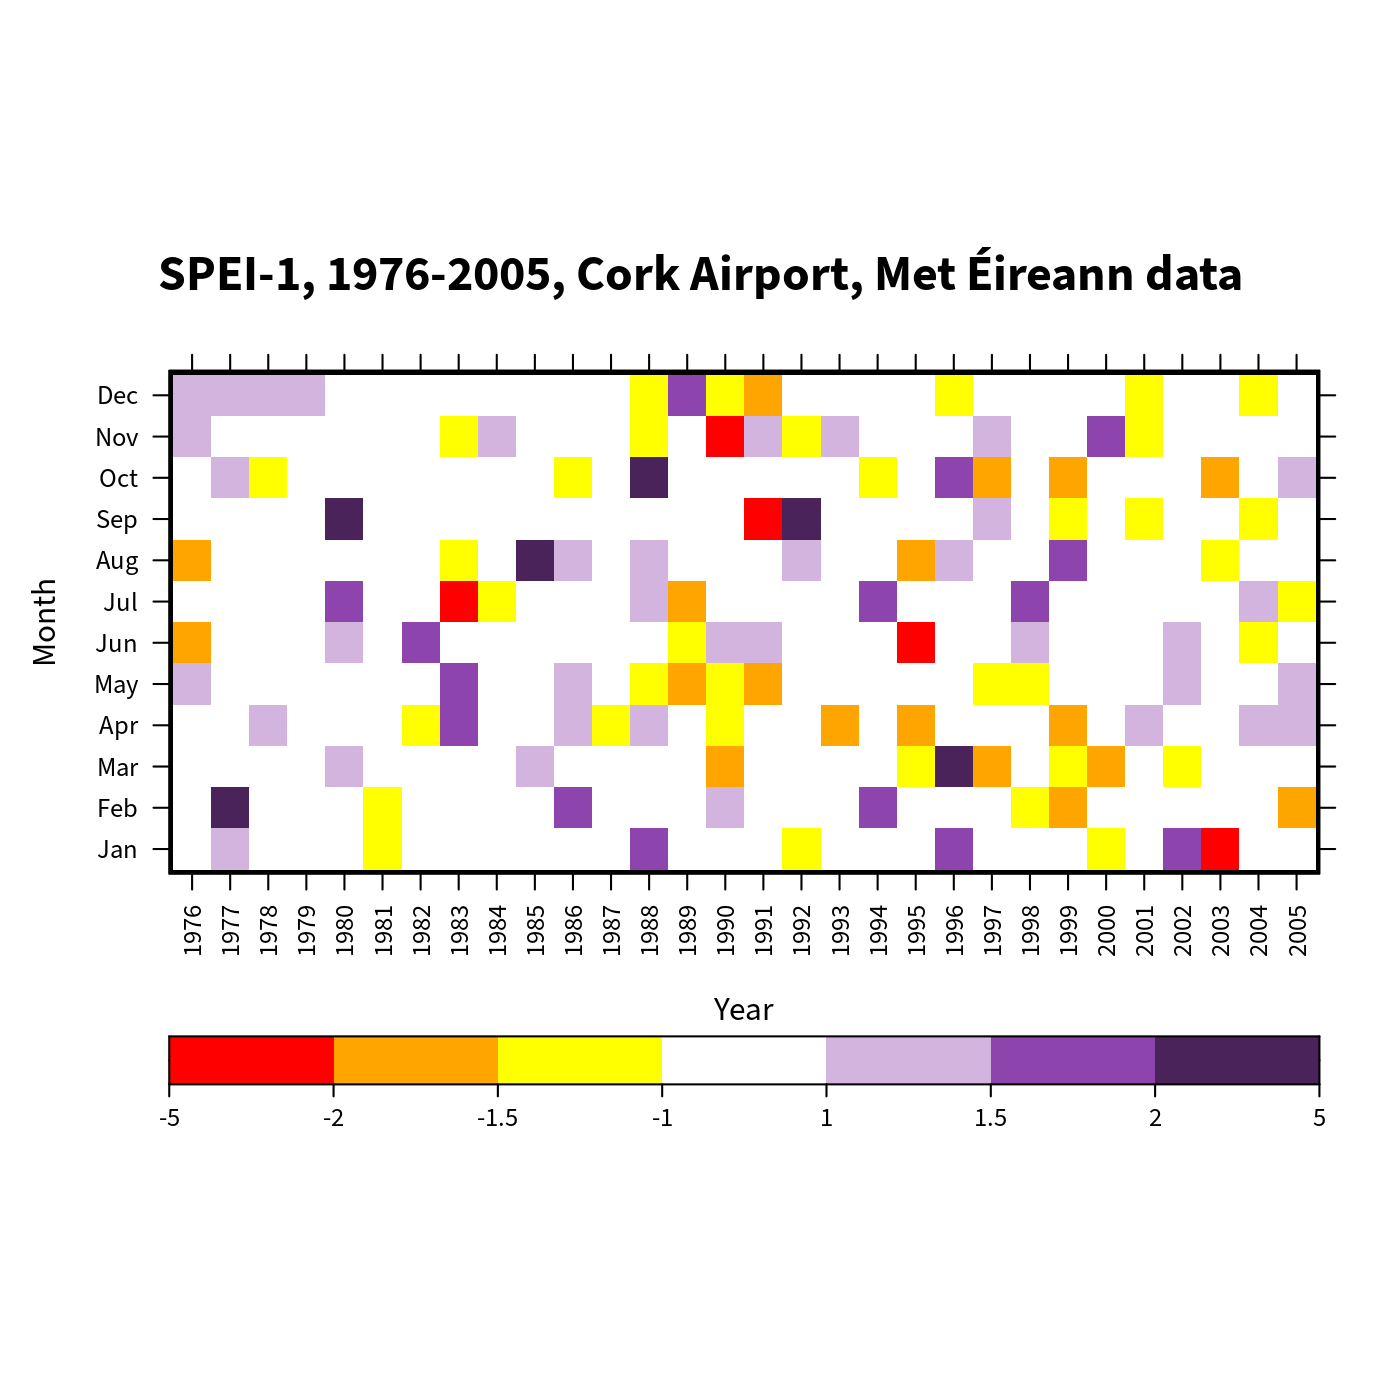

In [53]:
plot_title <- "SPEI-1, 1976-2005, Cork Airport, Met Éireann data"

spi_plot(data = spei, plot_title = plot_title)